# Analysis of US Liquidity (M2) and Stock Market Performance

## Introduction
The primary objective of this notebook is to analyze the relationship between the **M2 Money Supply** and the **S&P 500 Index**. 

M2 is a measure of the money supply that includes cash, checking deposits, and easily convertible near money. In macroeconomics, M2 is often considered a proxy for **market liquidity**. This analysis aims to verify the hypothesis: *"Does an increase in liquidity directly lead to a rise in stock prices?"*

**Key Indicators:**
- **S&P 500 (^GSPC):** Represents the US stock market performance.
- **M2 Money Stock (M2SL):** Represents the liquidity in the economy.


In [2]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.data_loader import get_macro_data

# Configuration for plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# Load Data using the modular function
# Fetching data from 2015 to capture the Pre-COVID, COVID, and Post-COVID eras
df = get_macro_data(start_year=2015)
df.tail()

[14:50:52.237169] Starting data collection... (From: 2015)
 -> FRED data collection completed.
 -> Stock market data collection completed.


,GDP,CPI,Unemployment,Fed_Rate,US_10Y,US_2Y,M2,SP500,Nasdaq
2026-01-05,31095.089,325.031,4.4,3.72,4.17,3.46,22322.4,6902.049805,23395.820312
2026-01-06,31095.089,325.031,4.4,3.72,4.18,3.47,22322.4,6944.819824,23547.169922
2026-01-07,31095.089,325.031,4.4,3.72,4.15,3.47,22322.4,6920.930176,23584.279297
2026-01-08,31095.089,325.031,4.4,3.72,4.19,3.49,22322.4,6921.459961,23480.019531
2026-01-09,31095.089,325.031,4.4,3.72,4.19,3.49,22322.4,6966.279785,23671.349609


In [3]:
df['M2'].describe

<bound method NDFrame.describe of 2015-01-02    11787.8
2015-01-05    11787.8
2015-01-06    11787.8
2015-01-07    11787.8
2015-01-08    11787.8
               ...   
2026-01-05    22322.4
2026-01-06    22322.4
2026-01-07    22322.4
2026-01-08    22322.4
2026-01-09    22322.4
Name: M2, Length: 2913, dtype: float64>

## Visualization

### Correlation between M2 and S&P 500

To visualize the relationship, I plotted both indicators on a **dual-axis chart**.
- **Left Axis (Black Line):** S&P 500 Index
- **Right Axis (Green Dashed Line):** M2 Money Stock (Billions of Dollars)

This visualization focuses on three key periods:
1.  **Quantitative Easing (QE):** The rapid expansion of M2 during the pandemic (2020-2021).
2.  **Quantitative Tightening (QT):** The contraction of M2 starting in 2022.
3.  **Recent Decoupling:** The divergence between M2 and stock prices in 2023-2024.

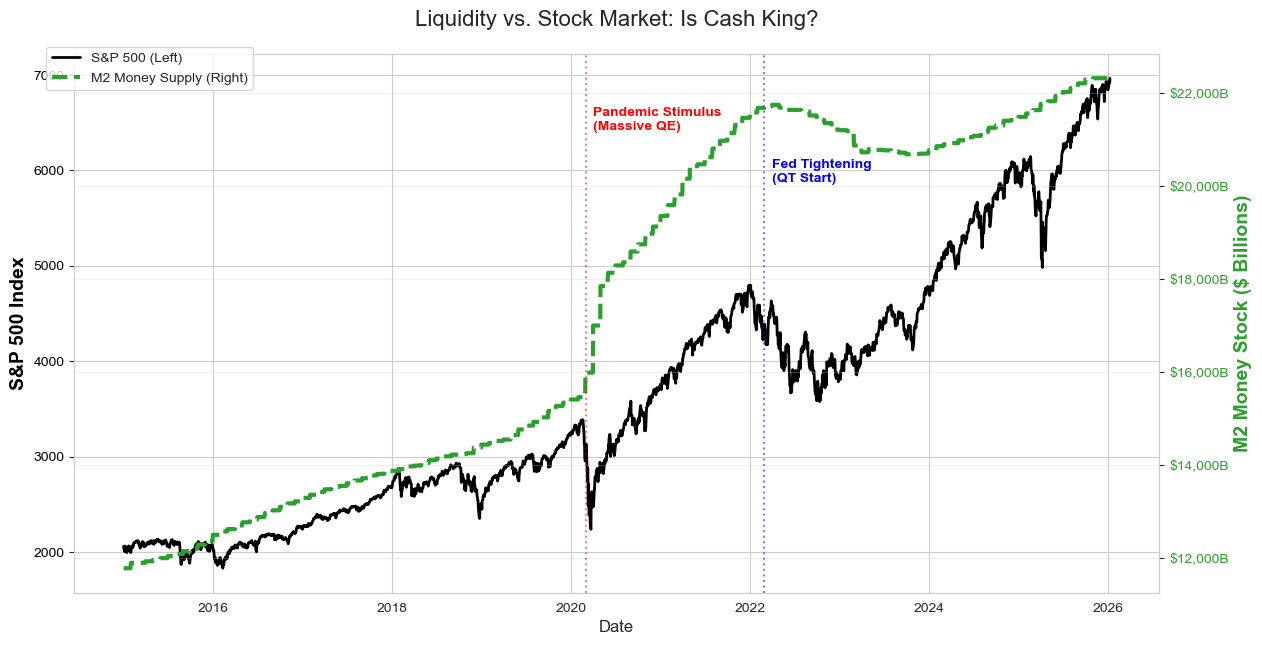

Correlation Coefficient (S&P 500 vs. M2): 0.90


In [4]:
import pandas as pd

# Create Dual-Axis Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 1: S&P 500
color_1 = 'black'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('S&P 500 Index', color=color_1, fontsize=14, fontweight='bold')
ax1.plot(df.index, df['SP500'], color=color_1, linewidth=2, label='S&P 500 (Left)')
ax1.tick_params(axis='y', labelcolor=color_1)

# Plot 2: M2 Money Supply
ax2 = ax1.twinx()
color_2 = '#2ca02c' # Green color representing money
ax2.set_ylabel('M2 Money Stock ($ Billions)', color=color_2, fontsize=14, fontweight='bold')
ax2.plot(df.index, df['M2'], color=color_2, linewidth=3, linestyle='--', label='M2 Money Supply (Right)')
ax2.tick_params(axis='y', labelcolor=color_2)

# Formatting Y-axis with Dollar sign and Commas
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}B'))

# Adding Annotations for Key Events
# 1. COVID-19 Pandemic Stimulus
plt.axvline(x=pd.Timestamp('2020-03-01'), color='red', linestyle=':', alpha=0.5)
plt.text(pd.Timestamp('2020-04-01'), df['M2'].max()*0.95, 'Pandemic Stimulus\n(Massive QE)', color='red', fontweight='bold')

# 2. Fed Tightening (Rate Hikes)
plt.axvline(x=pd.Timestamp('2022-03-01'), color='blue', linestyle=':', alpha=0.5)
plt.text(pd.Timestamp('2022-04-01'), df['M2'].max()*0.9, 'Fed Tightening\n(QT Start)', color='blue', fontweight='bold')

plt.title('Liquidity vs. Stock Market: Is Cash King?', fontsize=16, pad=20)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True, alpha=0.3)

plt.show()

# Calculate Correlation Coefficient
corr = df['SP500'].corr(df['M2'])
print(f"Correlation Coefficient (S&P 500 vs. M2): {corr:.2f}")

## YoY Growth Rate comparison
- YoY: Growth rate compared to previous year (exactly same date using 'ME')



In [5]:
df = get_macro_data(start_year=2010)

[14:50:55.706914] Starting data collection... (From: 2010)
 -> FRED data collection completed.
 -> Stock market data collection completed.


In [6]:

df_monthly = df.resample('ME').last()
df_yoy = df_monthly.pct_change(periods=12) * 100
df_yoy


,GDP,CPI,Unemployment,Fed_Rate,US_10Y,US_2Y,M2,SP500,Nasdaq
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-09-30,5.365421,3.022700,7.317073,-17.738791,9.186352,-1.639344,4.492553,16.069123,24.579680
2025-10-31,4.257835,2.789925,7.317073,-15.320911,-3.971963,-13.461538,4.645651,19.888877,31.112262
2025-11-30,4.257835,2.711969,7.142857,-16.379310,-3.827751,-15.980630,4.271300,13.538769,21.581241
2025-12-31,4.257835,2.338769,7.317073,-16.964286,-8.733624,-18.352941,4.190996,16.387806,20.357538


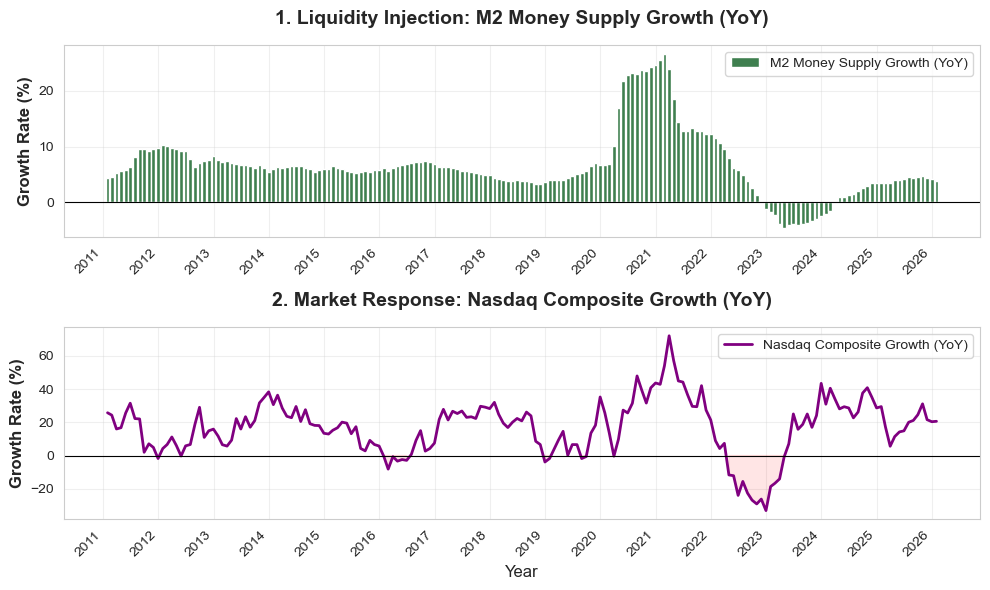

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

# --- Plot 1: M2 Growth Rate (Top) ---
ax1 = axes[0]
color_m2 = '#3f7f4f'
ax1.bar(df_yoy.index, df_yoy['M2'], color=color_m2, width=25, label='M2 Money Supply Growth (YoY)')

ax1.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('1. Liquidity Injection: M2 Money Supply Growth (YoY)', fontsize=14, fontweight='bold', pad=15)
ax1.axhline(0, color='black', linestyle='-', linewidth=0.8)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')
ax1.tick_params(labelbottom=True)

# --- Plot 2: Nasdaq Growth Rate (Bottom) ---
ax2 = axes[1]
color_nasdaq = 'purple'
ax2.plot(df_yoy.index, df_yoy['Nasdaq'], color=color_nasdaq, linewidth=2, label='Nasdaq Composite Growth (YoY)')

ax2.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_title('2. Market Response: Nasdaq Composite Growth (YoY)', fontsize=14, fontweight='bold', pad=15)
ax2.axhline(0, color='black', linestyle='-', linewidth=0.8)
ax2.fill_between(df_yoy.index, 0, df_yoy['Nasdaq'], where=(df_yoy['Nasdaq'] < 0), color='red', alpha=0.1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

locator = mdates.YearLocator()
formatter = mdates.DateFormatter('%Y')

for ax in axes:
    ax.xaxis.set_major_locator(locator) 
    ax.xaxis.set_major_formatter(formatter) 
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Insights

#### 1. The "Covid Liquidity" Correlation (2020 - 2021)
Observation: There is a synchronized, massive spike in both charts during 2020-2021. M2 supply growth exploded to historic highs (>25% YoY), driven by the Fed's stimulus.

Impact: The Nasdaq composite followed this trajectory almost perfectly, surging to over 60% YoY growth.

Takeaway: This period visually proves the "Liquidity-Driven Rally" thesis. When the central bank floods the market with cash, high-beta assets (Tech stocks) are the primary beneficiaries as excess capital seeks yield.

#### 2. The Pain of Tightening (2022)
Observation: As the Fed began Quantitative Tightening (QT) in 2022 to fight inflation, M2 growth plummeted, eventually turning negative (contracting) for the first time in decades.

Impact: The Nasdaq responded violently. The bottom chart shows a deep dive into negative territory (the red shaded area), dropping below -20% YoY.

Takeaway: "Don't fight the Fed." The removal of liquidity acts as gravity on asset prices. The charts show that tech stocks have a high sensitivity to the rate of change in money supply.

#### 3. The 2023-2024 "Decoupling" Mystery
Observation: This is the most interesting part of the analysis. In 2023 and 2024, M2 growth remained negative or very low (below the 0% line or barely positive). However, the Nasdaq (purple line) staged a massive recovery, returning to >30% growth.

Interpretation: The historical correlation broke down here. Why?

AI Revolution: The idiosyncratic growth of the AI sector (Nvidia, Microsoft, etc.) drove index performance despite poor macro liquidity.

Forward Looking: The market began pricing in future rate cuts before the money supply actually increased.

Takeaway: While liquidity is a major driver, innovation and sentiment can temporarily override macro headwinds.

## M2 Valuation Ratio Analysis
- High Ratio: indicates the Stock is overrated (Expensive)
- Low Ratio: indicates the Stock is underrated (Cheap)

Current Ratio: 0.3121
Historical Mean: 0.1851
Current Level is 3.06 Standard Deviations from the Mean.


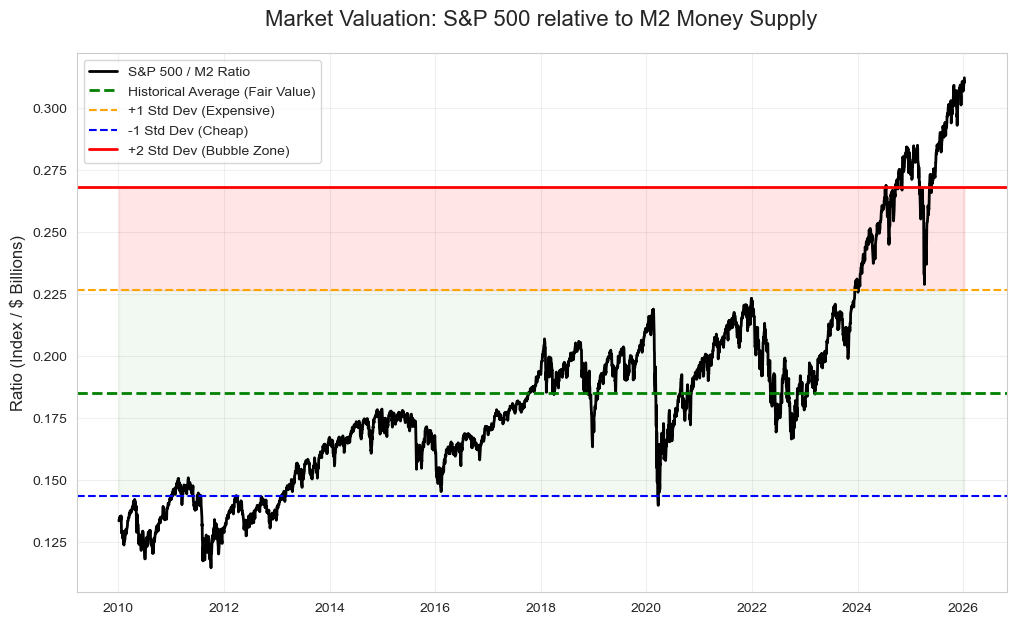

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Ratio Calculation (S&P 500 Price / M2 Money Supply)
# Interpretation: How much S&P 500 index value can 1 Billion of M2 buy?
df['M2_Ratio'] = df['SP500'] / df['M2']

# Statistical Analysis (Mean & Standard Deviation)
# Range: "Normal", "Expensive", and "Cheap"
mean_ratio = df['M2_Ratio'].mean()
std_ratio = df['M2_Ratio'].std()

current_ratio = df['M2_Ratio'].iloc[-1]
z_score = (current_ratio - mean_ratio) / std_ratio

print(f"Current Ratio: {current_ratio:.4f}")
print(f"Historical Mean: {mean_ratio:.4f}")
print(f"Current Level is {z_score:.2f} Standard Deviations from the Mean.")

# Visualization: Valuation Band
plt.figure(figsize=(12, 7))

# Plot the Ratio
plt.plot(df.index, df['M2_Ratio'], color='black', linewidth=2, label='S&P 500 / M2 Ratio')

# Plot Mean and Standard Deviation Bands
plt.axhline(mean_ratio, color='green', linestyle='--', linewidth=2, label='Historical Average (Fair Value)')
plt.axhline(mean_ratio + std_ratio, color='orange', linestyle='--', linewidth=1.5, label='+1 Std Dev (Expensive)')
plt.axhline(mean_ratio - std_ratio, color='blue', linestyle='--', linewidth=1.5, label='-1 Std Dev (Cheap)')
plt.axhline(mean_ratio + 2*std_ratio, color='red', linestyle='-', linewidth=2, label='+2 Std Dev (Bubble Zone)')

# Fill areas to make it look like a "Band"
plt.fill_between(df.index, mean_ratio + std_ratio, mean_ratio + 2*std_ratio, color='red', alpha=0.1)
plt.fill_between(df.index, mean_ratio - std_ratio, mean_ratio + std_ratio, color='green', alpha=0.05)

# Title and Labels
plt.title('Market Valuation: S&P 500 relative to M2 Money Supply', fontsize=16, pad=20)
plt.ylabel('Ratio (Index / $ Billions)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()

## Insights
While the correlation analysis showed that the market has decoupled from liquidity trends, the valuation analysis reveals the cost of that decoupling. The S&P 500 is currently trading in the 'Bubble Zone' (+2 Std Dev) relative to M2. 

This suggests that the current bull market is driven entirely by sentiment and earnings growth expectations (AI), fighting against the gravity of tightening liquidity.